<a href="https://colab.research.google.com/github/Sahithi-03/Linear-Regression-Machine-Learning-Project/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a Beginner Mahchine Learning Project which mainly focuses on Linear Regression**

In [31]:
import pandas as pd
data = pd.read_csv("/content/Solar Power Plant Data.csv")
print(data.shape)
data.describe()

(8760, 8)


,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


In [5]:
data.isnull().sum()   #To check Missing Values

Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

In [6]:
data   #Actual data

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0
...,...,...,...,...,...,...,...,...
8755,31.12.2017-19:00,4.1,0,988.2,-4.8,-0.7,94,0.0
8756,31.12.2017-20:00,2.1,0,987.3,-5.0,-0.3,95,0.0
8757,31.12.2017-21:00,1.8,0,986.7,-5.3,0.2,93,0.0
8758,31.12.2017-22:00,2.2,0,986.0,-5.4,0.3,92,0.0


In [7]:
data = data[['Radiation','SystemProduction']]       #We are considering the necessary columns to perform Linear Regression

In [8]:
X=data[['Radiation']]
Y=data[['SystemProduction']]   #Naming the columns

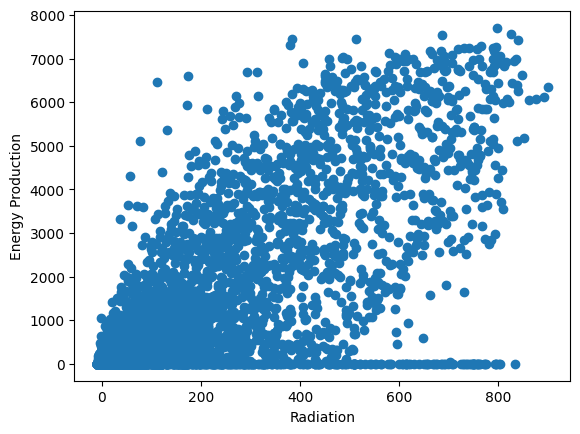

In [10]:
import matplotlib.pyplot as plt
plt.xlabel("Radiation")
plt.ylabel("Energy Production")
plt.scatter(X,Y)   #To know whether correlation exists or not?

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=23)   #Splitting the data into trai and test data

In [12]:
X_train

,Radiation
4847,-6.0
4597,229.9
3405,16.1
4526,338.1
7734,-5.5
...,...
4019,603.8
3674,-5.6
39,37.0
347,71.4


In [13]:
import numpy as np
X_train = np.array(X_train).reshape(-1, 1)

In [14]:
X_train

array([[ -6. ],
       [229.9],
       [ 16.1],
       ...,
       [ 37. ],
       [ 71.4],
       [ 22.5]])

In [15]:
X_test = np.array(X_test).reshape(-1, 1)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,Y_train)

LinearRegression()

In [33]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([[  18.82577654],
       [1559.131739  ],
       [ 163.12743729],
       ...,
       [ 299.59371374],
       [ 524.2080635 ],
       [ 204.91615352]])

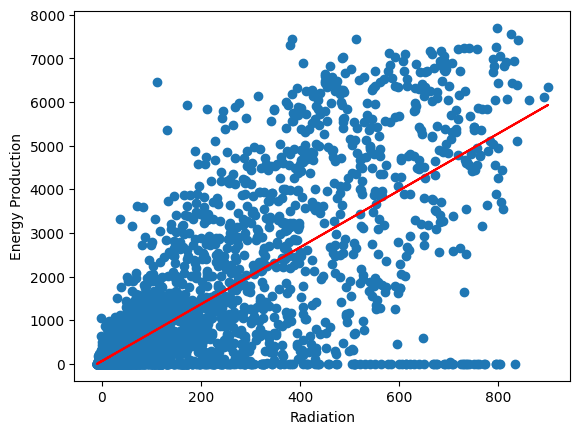

In [34]:
import matplotlib.pyplot as plt
plt.xlabel("Radiation")
plt.ylabel("Energy Production")
plt.scatter(X_train,Y_train)
plt.plot(X_train,y_pred_train, color = 'red')

In [36]:
#Now test data
y_pred_test = lr.predict(X_test)
y_pred_test

array([[  27.31410953],
       [ 649.57421221],
       [1006.08419758],
       ...,
       [   9.68449487],
       [3984.18317799],
       [ 806.93484678]])

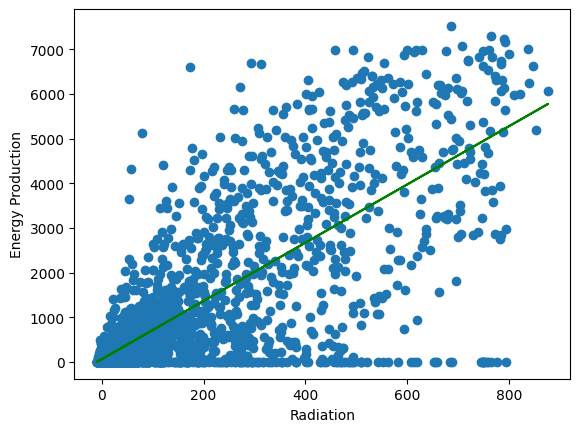

In [37]:
import matplotlib.pyplot as plt
plt.xlabel("Radiation")
plt.ylabel("Energy Production")
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred_test, color = 'green')